In [1]:
import pyTigerGraph as tg 
import pandas as pd
conn = tg.TigerGraphConnection(graphname="SCOTUS_Graph")
embeddingDim = 200

In [13]:
justices = conn.getVertices("Justice")

In [14]:
justices = [x["v_id"] for x in justices]

In [15]:
import numpy as np
labels = {"LIBERAL_VOTE": 1,
          "CONSERVATIVE_VOTE": 0}

def createData(justices):
    Xdata = []
    ydata = []
    for justice in justices:
        res = conn.runInstalledQuery("justiceCaseLinks", params={"justiceID": int(justice)})
        caseEmbeddings = pd.DataFrame.from_dict(res[0]["@@caseEmbeddings"], orient="index").reset_index().rename(columns={"index":"caseId"})
        caseVotes = pd.DataFrame.from_dict(res[0]["@@caseVote"], orient="index").reset_index().rename(columns={"index":"caseId", 0:"vote"})
        data = caseVotes.merge(caseEmbeddings, on="caseId")
        justiceEmbedding = pd.DataFrame.from_dict(res[0]["@@justiceEmbedding"], orient="index").reset_index().rename(columns={"index":"justice"})
        X = data[[i for i in range(0,embeddingDim)]].values
        je = justiceEmbedding[[i for i in range(0,embeddingDim)]].values
        je = np.tile(je, (X.shape[0], 1))
        X = np.append(X, je, axis=1)
        y = np.array([labels[x] for x in data["vote"]])
        Xdata.append(X)
        ydata.append(y)
    return np.concatenate(Xdata), np.concatenate(ydata)

In [16]:
X, y = createData(justices)

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

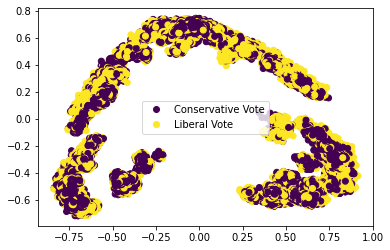

In [23]:
X_red = pca.fit_transform(X)

import matplotlib.pyplot as plt
plot = plt.scatter(X_red[:,0], X_red[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=["Conservative Vote","Liberal Vote"])
plt.show()

In [22]:
print(pca.explained_variance_ratio_)

[0.345374   0.26012118]


[0.345374   0.26012118 0.0906307 ]


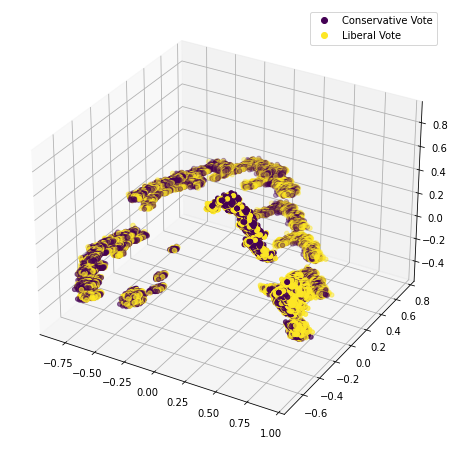

In [24]:
pca = PCA(n_components=3)
X_red = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_red[:,0], X_red[:,1], X_red[:,2], c=y)
ax.legend(handles=plot.legend_elements()[0], labels=["Conservative Vote","Liberal Vote"])
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
for i in range(10):
    print("ITERATION:" + str(i+1))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    print(classification_report(y_test, clf.predict(X_test), target_names=["Conservative Vote", "Liberal Vote"])) # non weighted fast rp resulted in 58% accuracy

ITERATION:1


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.63      0.64      0.63      7229
     Liberal Vote       0.67      0.66      0.67      8128

         accuracy                           0.65     15357
        macro avg       0.65      0.65      0.65     15357
     weighted avg       0.65      0.65      0.65     15357

ITERATION:2


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.62      0.63      0.63      7303
     Liberal Vote       0.66      0.65      0.66      8054

         accuracy                           0.64     15357
        macro avg       0.64      0.64      0.64     15357
     weighted avg       0.64      0.64      0.64     15357

ITERATION:3


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.62      0.63      0.63      7243
     Liberal Vote       0.67      0.66      0.66      8114

         accuracy                           0.65     15357
        macro avg       0.64      0.64      0.64     15357
     weighted avg       0.65      0.65      0.65     15357

ITERATION:4


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.61      0.63      0.62      7137
     Liberal Vote       0.67      0.65      0.66      8220

         accuracy                           0.64     15357
        macro avg       0.64      0.64      0.64     15357
     weighted avg       0.64      0.64      0.64     15357

ITERATION:5


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.62      0.64      0.63      7284
     Liberal Vote       0.66      0.65      0.65      8073

         accuracy                           0.64     15357
        macro avg       0.64      0.64      0.64     15357
     weighted avg       0.64      0.64      0.64     15357

ITERATION:6


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.62      0.63      0.62      7243
     Liberal Vote       0.66      0.66      0.66      8114

         accuracy                           0.64     15357
        macro avg       0.64      0.64      0.64     15357
     weighted avg       0.64      0.64      0.64     15357

ITERATION:7


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.62      0.63      0.62      7301
     Liberal Vote       0.66      0.66      0.66      8056

         accuracy                           0.64     15357
        macro avg       0.64      0.64      0.64     15357
     weighted avg       0.64      0.64      0.64     15357

ITERATION:8


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.63      0.63      0.63      7294
     Liberal Vote       0.66      0.67      0.66      8063

         accuracy                           0.65     15357
        macro avg       0.65      0.65      0.65     15357
     weighted avg       0.65      0.65      0.65     15357

ITERATION:9


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.63      0.63      0.63      7371
     Liberal Vote       0.66      0.66      0.66      7986

         accuracy                           0.64     15357
        macro avg       0.64      0.64      0.64     15357
     weighted avg       0.64      0.64      0.64     15357

ITERATION:10
                   precision    recall  f1-score   support

Conservative Vote       0.63      0.63      0.63      7308
     Liberal Vote       0.67      0.66      0.66      8049

         accuracy                           0.65     15357
        macro avg       0.65      0.65      0.65     15357
     weighted avg       0.65      0.65      0.65     15357



/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [18]:
X.shape

(76781, 400)

In [19]:
(y == 0).sum()/y.shape[0] # Percent ruling in favor of Defendant

0.47317695784113256

In [20]:
(y == 1).sum()/y.shape[0] # Percent ruling in favor of Plaintiff

0.5268230421588674

In [25]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test), target_names=["Conservative Vote", "Liberal Vote"]))

                   precision    recall  f1-score   support

Conservative Vote       0.60      0.60      0.60      7364
     Liberal Vote       0.63      0.63      0.63      7993

         accuracy                           0.61     15357
        macro avg       0.61      0.61      0.61     15357
     weighted avg       0.61      0.61      0.61     15357



In [25]:
def createTransform(X, method="L2"):
    case = X[:,:200]
    justice = X[:,200:]
    if method == "L2":
        return (case-justice)**2
    elif method == "hadamard":
        return np.multiply(case, justice)
    elif method == "L1":
        return np.abs(case-justice)
    else:
        return (case+justice)/2

In [26]:
from sklearn.linear_model import LogisticRegression
X_new = createTransform(X)
for i in range(10):
    print("ITERATION:" + str(i+1))
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    print(classification_report(y_test, clf.predict(X_test), target_names=["Conservative Vote", "Liberal Vote"])) # non weighted fast rp resulted in 58% accuracy

ITERATION:1
                   precision    recall  f1-score   support

Conservative Vote       0.63      0.45      0.53      7222
     Liberal Vote       0.61      0.76      0.68      8135

         accuracy                           0.62     15357
        macro avg       0.62      0.61      0.60     15357
     weighted avg       0.62      0.62      0.61     15357

ITERATION:2
                   precision    recall  f1-score   support

Conservative Vote       0.62      0.43      0.51      7294
     Liberal Vote       0.60      0.76      0.67      8063

         accuracy                           0.60     15357
        macro avg       0.61      0.60      0.59     15357
     weighted avg       0.61      0.60      0.59     15357

ITERATION:3
                   precision    recall  f1-score   support

Conservative Vote       0.61      0.44      0.51      7258
     Liberal Vote       0.60      0.75      0.67      8099

         accuracy                           0.60     15357
        macr

In [27]:
X_new = createTransform(X, method="hadamard")
for i in range(10):
    print("ITERATION:" + str(i+1))
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    print(classification_report(y_test, clf.predict(X_test), target_names=["Conservative Vote", "Liberal Vote"])) # non weighted fast rp resulted in 58% accuracy

ITERATION:1
                   precision    recall  f1-score   support

Conservative Vote       0.56      0.57      0.57      7261
     Liberal Vote       0.61      0.59      0.60      8096

         accuracy                           0.58     15357
        macro avg       0.58      0.58      0.58     15357
     weighted avg       0.58      0.58      0.58     15357

ITERATION:2
                   precision    recall  f1-score   support

Conservative Vote       0.57      0.55      0.56      7384
     Liberal Vote       0.60      0.62      0.61      7973

         accuracy                           0.59     15357
        macro avg       0.59      0.59      0.59     15357
     weighted avg       0.59      0.59      0.59     15357

ITERATION:3
                   precision    recall  f1-score   support

Conservative Vote       0.56      0.57      0.56      7324
     Liberal Vote       0.60      0.58      0.59      8033

         accuracy                           0.58     15357
        macr

In [28]:
X_new = createTransform(X, method="avg")
for i in range(10):
    print("ITERATION:" + str(i+1))
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    print(classification_report(y_test, clf.predict(X_test), target_names=["Conservative Vote", "Liberal Vote"])) # non weighted fast rp resulted in 58% accuracy

ITERATION:1


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.61      0.63      0.62      7216
     Liberal Vote       0.66      0.64      0.65      8141

         accuracy                           0.64     15357
        macro avg       0.64      0.64      0.64     15357
     weighted avg       0.64      0.64      0.64     15357

ITERATION:2


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.61      0.62      0.62      7287
     Liberal Vote       0.65      0.65      0.65      8070

         accuracy                           0.63     15357
        macro avg       0.63      0.63      0.63     15357
     weighted avg       0.63      0.63      0.63     15357

ITERATION:3


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.61      0.64      0.62      7210
     Liberal Vote       0.67      0.64      0.65      8147

         accuracy                           0.64     15357
        macro avg       0.64      0.64      0.64     15357
     weighted avg       0.64      0.64      0.64     15357

ITERATION:4


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.62      0.63      0.63      7329
     Liberal Vote       0.66      0.65      0.65      8028

         accuracy                           0.64     15357
        macro avg       0.64      0.64      0.64     15357
     weighted avg       0.64      0.64      0.64     15357

ITERATION:5


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.61      0.63      0.62      7264
     Liberal Vote       0.66      0.64      0.65      8093

         accuracy                           0.63     15357
        macro avg       0.63      0.63      0.63     15357
     weighted avg       0.63      0.63      0.63     15357

ITERATION:6


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.61      0.63      0.62      7340
     Liberal Vote       0.65      0.64      0.64      8017

         accuracy                           0.63     15357
        macro avg       0.63      0.63      0.63     15357
     weighted avg       0.63      0.63      0.63     15357

ITERATION:7


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.61      0.63      0.62      7268
     Liberal Vote       0.66      0.64      0.65      8089

         accuracy                           0.64     15357
        macro avg       0.64      0.64      0.64     15357
     weighted avg       0.64      0.64      0.64     15357

ITERATION:8


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.61      0.62      0.62      7258
     Liberal Vote       0.65      0.64      0.65      8099

         accuracy                           0.63     15357
        macro avg       0.63      0.63      0.63     15357
     weighted avg       0.63      0.63      0.63     15357

ITERATION:9


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.60      0.63      0.61      7221
     Liberal Vote       0.66      0.63      0.65      8136

         accuracy                           0.63     15357
        macro avg       0.63      0.63      0.63     15357
     weighted avg       0.63      0.63      0.63     15357

ITERATION:10
                   precision    recall  f1-score   support

Conservative Vote       0.61      0.62      0.61      7266
     Liberal Vote       0.65      0.64      0.65      8091

         accuracy                           0.63     15357
        macro avg       0.63      0.63      0.63     15357
     weighted avg       0.63      0.63      0.63     15357



/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [29]:
X_new = createTransform(X, method="L1")
for i in range(10):
    print("ITERATION:" + str(i+1))
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    print(classification_report(y_test, clf.predict(X_test), target_names=["Conservative Vote", "Liberal Vote"])) # non weighted fast rp resulted in 58% accuracy

ITERATION:1


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.62      0.60      0.61      7306
     Liberal Vote       0.65      0.66      0.65      8051

         accuracy                           0.63     15357
        macro avg       0.63      0.63      0.63     15357
     weighted avg       0.63      0.63      0.63     15357

ITERATION:2


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.61      0.61      0.61      7276
     Liberal Vote       0.65      0.65      0.65      8081

         accuracy                           0.63     15357
        macro avg       0.63      0.63      0.63     15357
     weighted avg       0.63      0.63      0.63     15357

ITERATION:3


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.61      0.62      0.61      7235
     Liberal Vote       0.65      0.64      0.65      8122

         accuracy                           0.63     15357
        macro avg       0.63      0.63      0.63     15357
     weighted avg       0.63      0.63      0.63     15357

ITERATION:4


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.61      0.61      0.61      7296
     Liberal Vote       0.65      0.65      0.65      8061

         accuracy                           0.63     15357
        macro avg       0.63      0.63      0.63     15357
     weighted avg       0.63      0.63      0.63     15357

ITERATION:5


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.61      0.62      0.62      7293
     Liberal Vote       0.65      0.65      0.65      8064

         accuracy                           0.63     15357
        macro avg       0.63      0.63      0.63     15357
     weighted avg       0.64      0.63      0.63     15357

ITERATION:6


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.61      0.62      0.61      7235
     Liberal Vote       0.65      0.64      0.65      8122

         accuracy                           0.63     15357
        macro avg       0.63      0.63      0.63     15357
     weighted avg       0.63      0.63      0.63     15357

ITERATION:7


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.60      0.63      0.61      7222
     Liberal Vote       0.66      0.63      0.65      8135

         accuracy                           0.63     15357
        macro avg       0.63      0.63      0.63     15357
     weighted avg       0.63      0.63      0.63     15357

ITERATION:8


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.60      0.62      0.61      7151
     Liberal Vote       0.66      0.64      0.65      8206

         accuracy                           0.63     15357
        macro avg       0.63      0.63      0.63     15357
     weighted avg       0.63      0.63      0.63     15357

ITERATION:9


/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                   precision    recall  f1-score   support

Conservative Vote       0.61      0.62      0.61      7222
     Liberal Vote       0.66      0.65      0.65      8135

         accuracy                           0.64     15357
        macro avg       0.63      0.63      0.63     15357
     weighted avg       0.64      0.64      0.64     15357

ITERATION:10
                   precision    recall  f1-score   support

Conservative Vote       0.61      0.61      0.61      7305
     Liberal Vote       0.65      0.64      0.65      8052

         accuracy                           0.63     15357
        macro avg       0.63      0.63      0.63     15357
     weighted avg       0.63      0.63      0.63     15357



/Users/parker.erickson/opt/anaconda3/envs/scotus/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.34163693 0.2544156  0.1144111 ]


NameError: name 'plot' is not defined

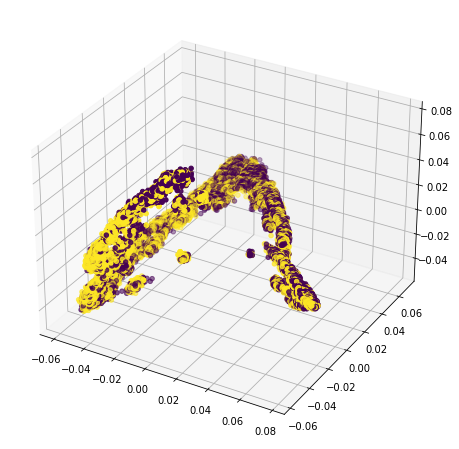

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=3)
X_red = pca.fit_transform(createTransform(X, method="hadamard"))
print(pca.explained_variance_ratio_)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_red[:,0], X_red[:,1], X_red[:,2], c=y)
ax.legend(handles=plot.legend_elements()[0], labels=["Conservative Vote","Liberal Vote"])
plt.show()